In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_regression,make_circles,load_digits,make_s_curve
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, KernelPCA
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# PCA
PCA làm tốt trên dữ liệu linear. Độ phức tạp thấp, tính toán nhanh. Ta sẽ tạo ra mặt phẳng đơn giản

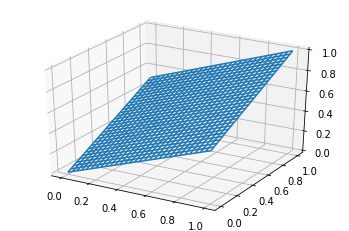

In [2]:
samples = 30
x = np.linspace(0,1,samples)
y = x
X,Y = np.meshgrid(x,y)
Z = Y + X+ 20

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.plot_wireframe(X,Y,Z)
#ax.scatter3D(X, Y, Z)

matrix = np.empty((samples*samples,3))
matrix[:,0] = X.reshape(samples*samples)
matrix[:,1] = Y.reshape(samples*samples)
matrix[:,2] = Z.reshape(samples*samples)
for i in range(matrix.shape[1]):
    matrix[:, i] = (matrix[:, i] - matrix[:, i].min()) / (matrix[:, i].max() - matrix[:, i].min())

X = matrix[:,0].reshape(samples,samples)
Y = matrix[:,1].reshape(samples,samples)
Z = matrix[:,2].reshape(samples,samples)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)

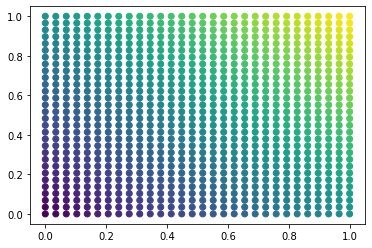

In [3]:
plt.scatter(X,Y,c=Z)

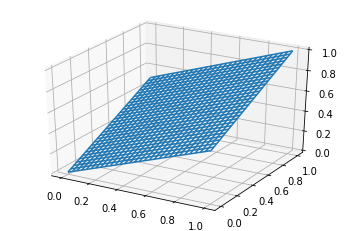

In [4]:
pca=PCA(2)
reduced_pca=pca.fit_transform(matrix)
reconstructed_pca=pca.inverse_transform(reduced_pca)

X = reconstructed_pca[:,0].reshape(samples,samples)
Y = reconstructed_pca[:,1].reshape(samples,samples)
Z = reconstructed_pca[:,2].reshape(samples,samples)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)

# ICA

ICA và PCA dùng cho 2 mục đích khác nhau mặc dù cả 2 đều có tác dụng giảm chiều. PCA chỉ giảm chiều còn ICA có thể dùng để phân tách nguồn tín hiệu. Chẳng hạn như một đoạn ghi âm có 2 giọng nói gồm giong nam và nữ thì ICA có thể tách ra giọng nam riêng và giọng nữ riêng.

PCA có mục đích là nén lại còn ICA có mục đích tách thông tin.

Ta sẽ tạo ra một bộ dữ liệu gồm 3 nguồn sóng khác nhau gồm 3 loại đường Sin, Square và Sawtooth.

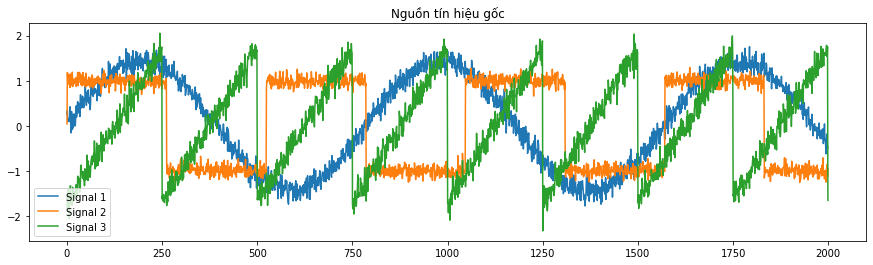

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Tín hiệu 1 : đường sin
s2 = np.sign(np.sin(3 * time))  # Tín hiệu 2 : đường square
s3 = signal.sawtooth(2 * np.pi * time)  # Tín hiệu 3: đường sawtooth
S = np.c_[s1, s2, s3]

#Noise
S += 0.1 * np.random.normal(size=S.shape)
S /= S.std(axis=0)

data=pd.DataFrame(data=S,columns=["Signal 1","Signal 2","Signal 3"])
data.plot(figsize=(15,4))
plt.legend(loc='lower left')
plt.title('Nguồn tín hiệu gốc')
plt.show()

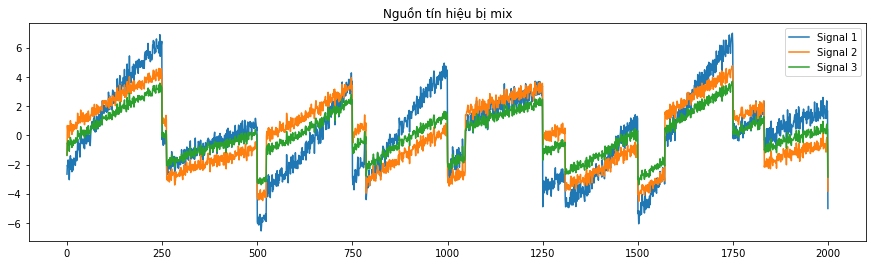

In [6]:
#Kế tiếp chúng ta mix 3 nguồn tín hiệu này lại
A = np.array([[1.5, 1, 2], [0.5, 2, 1.0], [.5, 1.0, 1.0]])  # Mixing matrix
X = np.dot(S, A.T)
data_mixed=pd.DataFrame({'Signal 1':X[:,0],'Signal 2':X[:,1],'Signal 3':X[:,2]})
data_mixed.plot(figsize=(15,4))
plt.title('Nguồn tín hiệu bị mix')
plt.show()

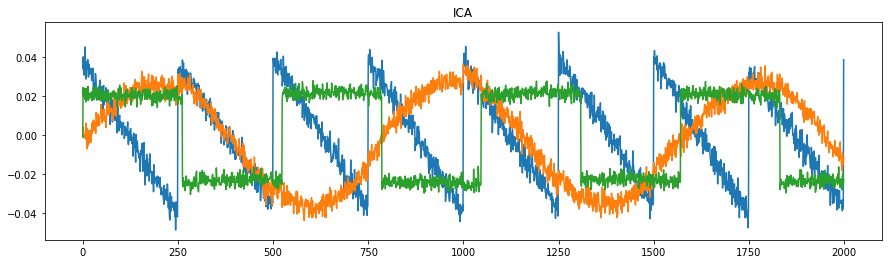

In [7]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
f = plt.figure(figsize=(15,4))
plt.title('ICA')
plt.plot(S_)

ICA có thể tách được nguồn tín hiệu gốc, khôi phục lại đúng hình dạng của 3 đường tín hiệu: đường sin, square, sawtooth so với PCA (phía dưới) không tách được

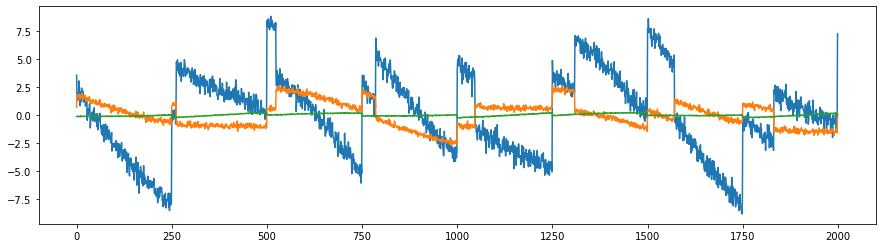

In [8]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components
f = plt.figure(figsize=(15,4))
plt.plot(H)

Và để khôi phục lại tín hiệu ban đầu thì ICA cũng làm tốt hơn PCA

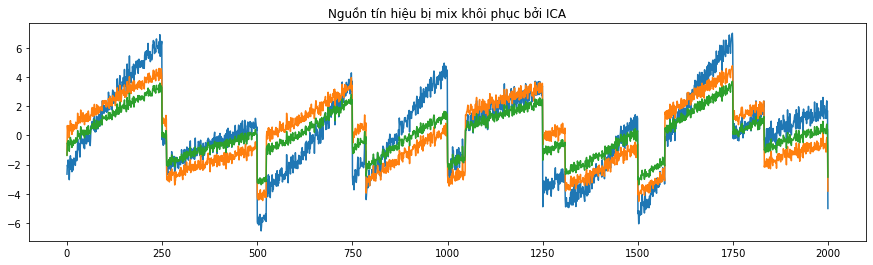

In [9]:
i=ica.inverse_transform(S_)
fig=plt.figure(figsize=(15,4))
plt.title('Nguồn tín hiệu bị mix khôi phục bởi ICA')
plt.plot(i)

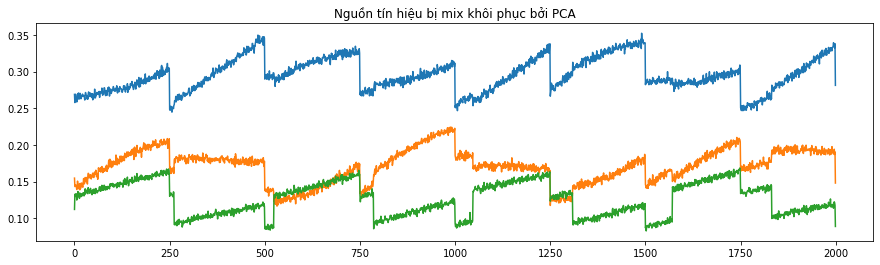

In [10]:
i=pca.inverse_transform(S_)
fig=plt.figure(figsize=(15,4))
plt.title('Nguồn tín hiệu bị mix khôi phục bởi PCA')
plt.plot(i)

# KPCA
KPCA là một biến thể của PCA, nó có thể giảm chiều các dữ liệu non-linear nhờ vào tạo ra các feature mới từ kernel. Ta sẽ tạo dữ liệu có dạng mặt phẳng cong

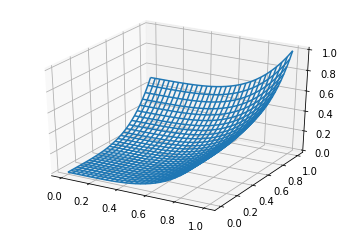

In [11]:
samples = 30
x = np.linspace(0,1,samples)
y = x
X,Y = np.meshgrid(x,y)
Z = Y**4 + X**4+ 20

#fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.plot_wireframe(X,Y,Z)
#ax.scatter3D(X, Y, Z)

matrix = np.empty((samples*samples,3))
matrix[:,0] = X.reshape(samples*samples)
matrix[:,1] = Y.reshape(samples*samples)
matrix[:,2] = Z.reshape(samples*samples)
for i in range(matrix.shape[1]):
    matrix[:, i] = (matrix[:, i] - matrix[:, i].min()) / (matrix[:, i].max() - matrix[:, i].min())

X = matrix[:,0].reshape(samples,samples)
Y = matrix[:,1].reshape(samples,samples)
Z = matrix[:,2].reshape(samples,samples)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)

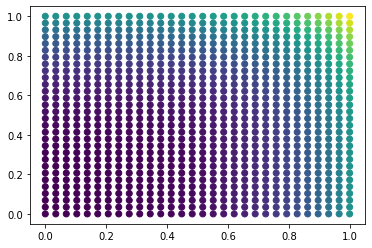

In [12]:
plt.scatter(X,Y,c=Z)

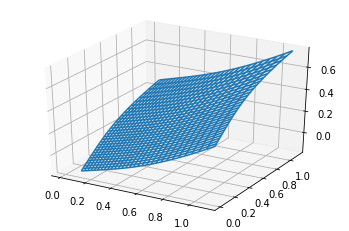

In [13]:
#PCA
pca=PCA(2)
reduced_pca=pca.fit_transform(matrix)
reconstructed_pca=pca.inverse_transform(reduced_pca)

X = reconstructed_pca[:,0].reshape(samples,samples)
Y = reconstructed_pca[:,1].reshape(samples,samples)
Z = reconstructed_pca[:,2].reshape(samples,samples)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)

PCA không thể khôi phục lại mặt phẳng cong

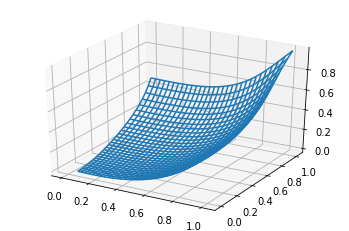

In [14]:
#KPCA
pca=KernelPCA(2,fit_inverse_transform=True,kernel='poly')
reduced_pca=pca.fit_transform(matrix)
reconstructed_pca=pca.inverse_transform(reduced_pca)

X = reconstructed_pca[:,0].reshape(samples,samples)
Y = reconstructed_pca[:,1].reshape(samples,samples)
Z = reconstructed_pca[:,2].reshape(samples,samples)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)

KPCA khôi phực được mặt phẳng cong.

# T-SNE

T-SNE thường được dùng cho trực quan hóa và có thể giảm chiều dữ liệu phức tạp hơn PCA và KPCA. Khuyết điểm của nó là chi phí tính toán cao nên T-SNE được dùng cho trực quan hơn là xử lý. Một khuyết điểm nữa là dù khả năng trực quan khi giảm chiều tốt nhưng T-SNE không thể từ chiều không gian thấp hơn mà suy ngược lại dữ liệu ban đầu.

Chính vì dùng cho trực quan nên có một số ứng dụng sẽ không thể dùng T-SNE. Chẳng hạn như nén ảnh. Dù khả năng giảm chiều của T-SNE tốt nhưng không có khả năng hồi phục thì việc nén ảnh dùng T-SNE là vô nghĩa.

Ta sẽ tạo ra dữ liệu kiểu hình chữ S và xem khả năng giảm chiều của T-SNE tốt như thế nào. Ta sẽ chỉ quan tâm đến trực quan kết quả sau khi giảm chiều mà không quan tâm đến khả năng phục hồi dữ liệu gốc vì T-SNE không thể làm được điều này.

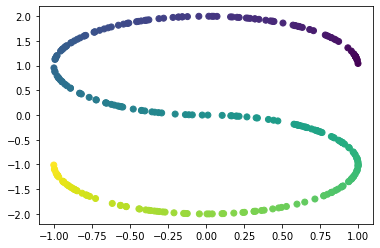

In [15]:
X, y = make_s_curve(n_samples=300, random_state=0)
plt.scatter(X[:, 0], X[:, 2], c=y)

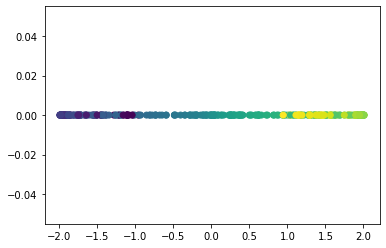

In [16]:
pca=PCA(n_components=1)
Y=pca.fit_transform(X)
plt.scatter(Y[:, 0], y=[0]*300, c=y)

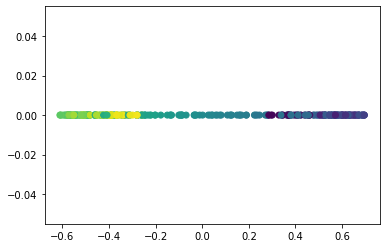

In [17]:
kpca=KernelPCA(kernel='rbf',n_components=1)
Y=kpca.fit_transform(X)
plt.scatter(Y[:, 0], y=[0]*300, c=y)

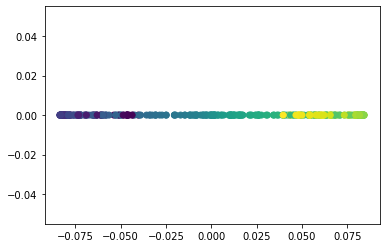

In [18]:
ica=FastICA(n_components=1)
Y=ica.fit_transform(X)
plt.scatter(Y[:, 0], y=[0]*300, c=y)

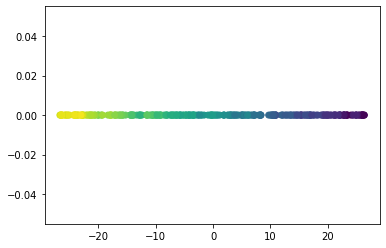

In [19]:
tsne=TSNE(n_components=1, init='random',
                         random_state=0)
Y = tsne.fit_transform(X)
plt.scatter(Y[:, 0], y=[0]*300, c=y)

Ta thấy chỉ có T-SNE là có miền giá từ nhạt đến đậm tốt nhất. Mặc dù vậy ta sẽ không tìm lại được hình dạng chữ S ban đầu.

# Autoencoder

Autoencoder cố gắng giảm thiệu độ lỗi sau khi khôi phục dữ liệu. Và vì nó là mạng neuron nên có thể fit các dữ liệu vô cùng phức tạp. Khác với mục tiêu chính là trực quan hóa của các thuật toán giảm chiều khác, Autoencoder tập trung vào việc dữ liệu được khôi phục lại mà ít bị mất thông tin nhất. Một ví dụ mà cho thấy Autoencoder sẽ là phù hợp là nén ảnh. Giả sử ta có bức ảnh 8x8=64 chiều ta có thể nén nó lại còn 3x3=9 chiều và sau đó khôi phục lại một bức ảnh gần giống với ảnh gốc.

Ngoài ra autoencoder còn có thêm khả năng khử nhiễu rất tốt. Nên bộ dữ liệu ta sẽ chọn cho autoencoder là bộ dữ liệu chữ viết tay + nhiễu.

Lý do dữ liệu này dùng Autoencoder tốt hơn các thuật toán khác:
*   PCA,KPCA: Không thể khử nhiễu, không thể fit dữ liệu quá phức tạp.
*   ICA: Bản chất của ICA không phải là để nén dữ liệu mà để phân tách.
*   T-SNE: Giảm chiều được nhưng không thể khôi phục ảnh.



In [20]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [21]:
#Load bộ dữ liệu viết tay
(train_data, _), (test_data, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


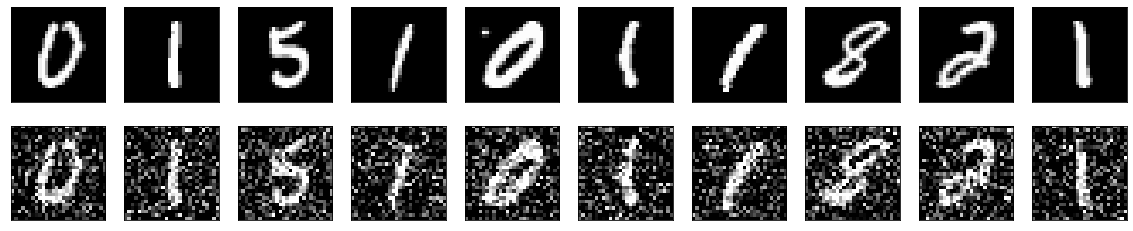

In [22]:
# Chuẩn hóa
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Thêm nhiễu
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Hiển thị ảnh gốc và ảnh nhiễu
display(train_data, noisy_train_data)

Thiết kế mạng autoenoder:

Ảnh gốc có kích thước là 28x28=784 chiều. Ta sẽ giảm chiều nó xuống thành 64 chiều và khôi phục lại ảnh không nhiễu. Đầu vào của mạng là ảnh có nhiều, đầu ra là ảnh không bị nhiễu. Autoencoder sẽ học dữ liệu này và tìm cách khử nhiễu cho ảnh

In [23]:
input = layers.Input(shape=(28, 28, 1))
encoded=layers.Flatten()(input)
encoded = layers.Dense(512, activation = 'relu')(encoded) 
encoded = layers.Dense(256, activation = 'relu')(encoded) 
encoded = layers.Dense(64, activation = 'relu')(encoded) 
 
decoded = layers.Dense(512, activation = 'relu')(encoded) 
decoded = layers.Dense(784, activation = 'sigmoid')(decoded) 
decoded = layers.Reshape(target_shape=(28,28,1))(decoded) 
autoencoder = Model(input, decoded) 
autoencoder.compile(loss= 'binary_crossentropy' , optimizer = 'adam') 
autoencoder.summary() 

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 512)               33280     
_________________________________________________________________
dense_4 (Dense)              (None, 784)               402192

In [24]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
235/235 [==============================] - 10s 40ms/step - loss: 0.2192 - val_loss: 0.2004
Epoch 2/50
235/235 [==============================] - 9s 39ms/step - loss: 0.1395 - val_loss: 0.1663
Epoch 3/50
235/235 [==============================] - 9s 39ms/step - loss: 0.1237 - val_loss: 0.1477
Epoch 4/50
235/235 [==============================] - 9s 39ms/step - loss: 0.1161 - val_loss: 0.1324
Epoch 5/50
235/235 [==============================] - 9s 40ms/step - loss: 0.1117 - val_loss: 0.1211
Epoch 6/50
235/235 [==============================] - 9s 40ms/step - loss: 0.1083 - val_loss: 0.1125
Epoch 7/50
235/235 [==============================] - 9s 40ms/step - loss: 0.1057 - val_loss: 0.1044
Epoch 8/50
235/235 [==============================] - 9s 39ms/step - loss: 0.1039 - val_loss: 0.1030
Epoch 9/50
235/235 [==============================] - 9s 40ms/step - loss: 0.1022 - val_loss: 0.0984
Epoch 10/50
235/235 [==============================] - 9s 40ms/step - loss: 0.1009 - val_l

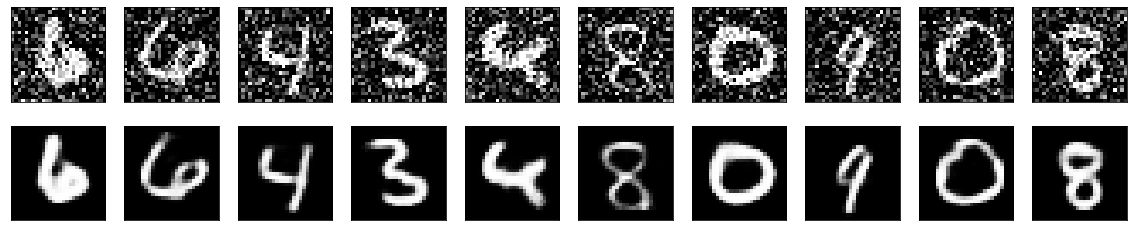

In [25]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)